In [145]:
import CGNS.MAP as MAP
import CGNS.PAT.cgnsutils as cgnsutils


In [167]:
# CGNSファイルを開く
(tree,links,paths) = MAP.load(r"../data/star.cgns")

for p in cgnsutils.getAllPaths(tree): 
    print(p)

/Base
/Base/693A3T1X
/Base/693A3T1X/693A3T1X
/Base/693A3T1X/693A3T1X/ElementConnectivity
/Base/693A3T1X/693A3T1X/ElementRange
/Base/693A3T1X/GridCoordinates
/Base/693A3T1X/GridCoordinates/CoordinateX
/Base/693A3T1X/GridCoordinates/CoordinateY
/Base/693A3T1X/GridCoordinates/CoordinateZ
/Base/693A3T1X/StarZoneInfo
/Base/693A3T1X/StarZoneInfo/ContinuumName
/Base/693A3T1X/StarZoneInfo/RegionName
/Base/693A3T1X/StarZoneInfo/RegionType
/Base/693A3T1X/Zcon_693A3T1X
/Base/693A3T1X/ZoneType
/Base/DataClass
/Base/DimensionalUnits
/Base/DimensionalUnits/AdditionalUnits
/Base/Export Info:
/CGNSLibraryVersion


In [168]:
coordinate_path = cgnsutils.getPathsByTypeSet(tree,["GridCoordinates_t"])
coordinate_path

['/Base/693A3T1X/GridCoordinates']

In [169]:
GridCoordinates = cgnsutils.getNodeByPath(tree, coordinate_path[0])
GridCoordinates

['GridCoordinates',
 None,
 [['CoordinateX',
   array([-0.001625  , -0.00159197, -0.00148924, ...,  0.00098468,
           0.00102187,  0.00106625]),
   [],
   'DataArray_t'],
  ['CoordinateY',
   array([-0.00281458, -0.00275737, -0.00288872, ..., -0.00189155,
          -0.00176994, -0.0018468 ]),
   [],
   'DataArray_t'],
  ['CoordinateZ',
   array([0.00338207, 0.00352493, 0.0035    , ..., 0.0002    , 0.0002    ,
          0.0002    ]),
   [],
   'DataArray_t']],
 'GridCoordinates_t']

In [170]:
X = GridCoordinates[2][0][1]
Y = GridCoordinates[2][1][1]
Z = GridCoordinates[2][2][1]

X.shape

(7431,)

In [171]:
# X *= -1
# Y *= -1

# MAP.save(r"../data/star2.cgns", tree)


In [172]:
import vtk
import numpy as np

# Load the VTK file
reader = vtk.vtkXMLUnstructuredGridReader()
reader.SetFileName("../data/random/Tetra_linspace0.vtu")
reader.Update()

# Get the output data
data = reader.GetOutput()

# Get the points (coordinates)
points = data.GetPoints()

# Extract the coordinates
coordinates = []
for i in range(points.GetNumberOfPoints()):
    coordinate = points.GetPoint(i)
    coordinates.append(coordinate)

coordinates = np.array(coordinates)
coordinates.shape


(7431, 3)

In [173]:
X[:10], -coordinates[:10, 0]

(array([-0.001625  , -0.00159197, -0.00148924, -0.001625  , -0.00154223,
        -0.00147166, -0.0014925 , -0.00136781, -0.00143922, -0.00155507]),
 array([-0.001625  , -0.00159197, -0.00148924, -0.001625  , -0.00154223,
        -0.00147473, -0.0014925 , -0.00136781, -0.00143922, -0.00155753]))

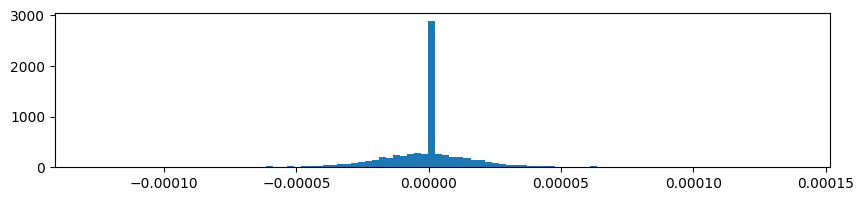

In [174]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 2))
plt.hist(X+coordinates[:, 0], bins=100)
plt.show()

In [177]:
X += -X-coordinates[:, 0] + 0
Y += -Y-coordinates[:, 1] + 0
Z += -Z+coordinates[:, 2] + 0


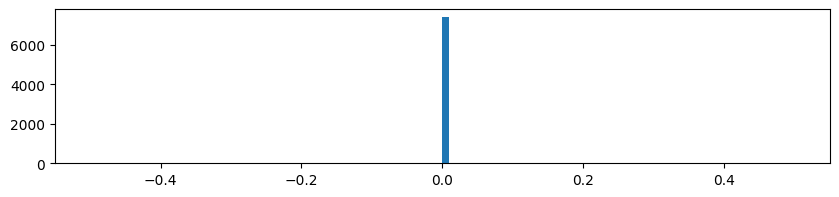

In [180]:
plt.figure(figsize=(10, 2))
plt.hist(X+coordinates[:, 0], bins=100)
plt.show()

In [179]:
MAP.save(r"../data/star_linspace0.cgns", tree)
